                    body  submission  label
subreddit                                  
askreddit          18304       18304  18304
askscience          3804        3804   3804
explainlikeimfive   3470        3470   3470
news               15036       15036  15036
science            10311       10311  10311
todayilearned      17640       17640  17640
worldnews          16708       16708  16708

                   body  submission  label
subreddit                                 
askreddit          9427        9427   9427
askscience          613         613    613
explainlikeimfive   587         587    587
news               2269        2269   2269
science             896         896    896
todayilearned      1389        1389   1389
worldnews          1659        1659   1659

(16840, 4)


<AxesSubplot:>

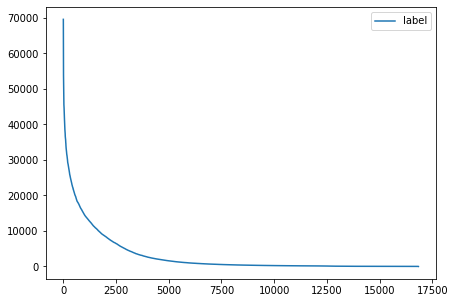

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn import metrics
from numpy import ndarray
import time
import pandas as pd
from numpy import mean
from numpy import std
from math import sqrt
import numpy as np
import math

# Load pickle
from parseit.data import load_pickle, save_pickle
nov_df = load_pickle("nov-11-45009c.p")
oct_df = load_pickle("okt-5-43896c.p")
nov_df = nov_df.replace({"AskReddit": "askreddit"})

subs = set(list(nov_df.subreddit))

all_df = pd.concat([oct_df, nov_df], axis=0, sort=False)
all_df = all_df[all_df.body != "[removed]"]
all_df = all_df[all_df.body != "[deleted]"]


print(f"{all_df.groupby(all_df.subreddit).count()}\n")
new_dfs = {}
for sub in subs:
    subdf = all_df[all_df.subreddit == sub]
    #number_of_indexes = len(subdf[subdf.label < 100])
    drop_indexes = subdf[subdf.label < 100].sample(axis=0, frac=0.85).index
    subdf = subdf.drop(axis=1, index=drop_indexes)
    #drop_indexes = subdf[subdf.label < 100][subdf.label > 10].sample(axis=0, frac=0.8).index
    #subdf = subdf.drop(axis=1, index=drop_indexes).reset_index()
    new_dfs[sub] = subdf
    
    #display(subdf[subdf.label == 0])

new_df = pd.DataFrame()
for sub in subs:
    new_df = pd.concat([new_df, new_dfs[sub]])


print(f"{new_df.groupby(new_df.subreddit).count()}\n")
print(new_df.shape)

new_df = new_df.reset_index(drop=True)

label_sorted = new_df[["label"]].sort_values("label", ascending=False).reset_index().drop("index", axis=1)
label_sorted.plot.line(figsize=(7,5))



In [11]:
save_df = new_df
print(save_df.shape)
save_pickle(save_df, "data-16k-dec-3.p")
print("saved")

(16840, 4)
saved
